In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import spacy
from matplotlib.pyplot import imread
from wordcloud import WordCloud
%matplotlib inline

In [4]:
# loading dataset
review = pd.read_csv('/content/drive/MyDrive/assignment/Musical_instruments_reviews.csv')

In [5]:
review.shape

(10261, 9)

In [6]:
review.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [7]:
# Renaming columns for ease of reference
review = review.rename({'reviewerID':'review_id', 'reviewerName':'review_name', 'reviewText':'review_text',
               'unixReviewTime':'unix_review_time', 'reviewTime':'review_time'}, axis = 1)
review.head()


,review_id,asin,review_name,helpful,review_text,overall,summary,unix_review_time,review_time
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [8]:
review.isnull().sum()

review_id            0
asin                 0
review_name         27
helpful              0
review_text          7
overall              0
summary              0
unix_review_time     0
review_time          0
dtype: int64

In [9]:
review.columns

Index(['review_id', 'asin', 'review_name', 'helpful', 'review_text', 'overall',
       'summary', 'unix_review_time', 'review_time'],
      dtype='object')

In [10]:
review['review_text'] = review['review_text'].fillna('missing')

In [11]:
review.isnull().sum()

review_id            0
asin                 0
review_name         27
helpful              0
review_text          0
overall              0
summary              0
unix_review_time     0
review_time          0
dtype: int64

In [12]:
## overall rating distribtuion
review['overall'].value_counts()

5.0    6938
4.0    2084
3.0     772
2.0     250
1.0     217
Name: overall, dtype: int64

In [13]:
### combine reviewText and summary and

review['reviews'] = review['review_text'] + review['summary']

reviews = review.drop(['review_text', 'summary'], axis=1)

reviews.head()

,review_id,asin,review_name,helpful,overall,unix_review_time,review_time,reviews
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"02 28, 2014","Not much to write about here, but it does exac..."
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,"03 16, 2013",The product does exactly as it should and is q...
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,"08 28, 2013",The primary job of this device is to block the...
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,"02 14, 2014",Nice windscreen protects my MXL mic and preven...
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,"02 21, 2014",This pop filter is great. It looks and perform...


In [14]:
### value fucntion
def sent(rating):
    if rating['overall'] == 3:
        value = 'Neutral'
    elif rating['overall'] > 3:
        value = 'Positive'
    else:
        value = 'Negative'
    return value

In [15]:
### create Sentiment column

reviews['sentiment'] = reviews.apply(sent, axis=1)
reviews.head()

,review_id,asin,review_name,helpful,overall,unix_review_time,review_time,reviews,sentiment
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"02 28, 2014","Not much to write about here, but it does exac...",Positive
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,"03 16, 2013",The product does exactly as it should and is q...,Positive
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,"08 28, 2013",The primary job of this device is to block the...,Positive
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,"02 14, 2014",Nice windscreen protects my MXL mic and preven...,Positive
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,"02 21, 2014",This pop filter is great. It looks and perform...,Positive


In [16]:
reviews.sentiment.value_counts()

Positive    9022
Neutral      772
Negative     467
Name: sentiment, dtype: int64

In [17]:
#spliting the date
re_new =  reviews['review_time'].str.split(',', n=1, expand=True)

## adding the date to the main dataset
reviews['date'] = re_new[0]

## adding the year to the main dataset
reviews['year'] = re_new[1]


##reviews.head()

#split the date column

re_new1 = reviews['date'].str.split(' ', n=1, expand=True)

#adding the Month to the main dataset
reviews['Month'] = re_new1[0]

#adding the day to the main dataset
reviews['day'] = re_new1[1]

## drop the reviewTime and Date column
reviews = reviews.drop(['review_time', 'date'], axis=1)


reviews.head()

,review_id,asin,review_name,helpful,overall,unix_review_time,reviews,sentiment,year,Month,day
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"Not much to write about here, but it does exac...",Positive,2014,02,28
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,The product does exactly as it should and is q...,Positive,2013,03,16
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,The primary job of this device is to block the...,Positive,2013,08,28
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,Nice windscreen protects my MXL mic and preven...,Positive,2014,02,14
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,This pop filter is great. It looks and perform...,Positive,2014,02,21


In [18]:
reviews['year'].value_counts()

 2013    4055
 2014    2679
 2012    1936
 2011    1007
 2010     350
 2009     128
 2008      63
 2007      22
 2006      10
 2004       7
 2005       4
Name: year, dtype: int64

In [19]:
reviews.columns

Index(['review_id', 'asin', 'review_name', 'helpful', 'overall',
       'unix_review_time', 'reviews', 'sentiment', 'year', 'Month', 'day'],
      dtype='object')

In [20]:
reviews = reviews.drop(['review_name','unix_review_time'],axis = 1)

In [21]:
# Splitting the dataset based on comma and square bracket

re_new = reviews["helpful"].str.split(",", n = 1, expand = True)
new2 = re_new[0].str.split("[", n = 1, expand = True)
new3 = re_new[1].str.split("]", n = 1, expand = True)

#Resetting the index
new2.reset_index(drop=True, inplace=True)
new3.reset_index(drop=True, inplace=True)

#Dropping empty columns due to splitting
new2=new2.drop([0], axis=1)
new3=new3.drop([1], axis=1)

#Concatenating the splitted columns
helpful=pd.concat([new2, new3], axis=1)

In [24]:
helpful

,1,0
0,0,0
1,13,14
2,1,1
3,0,0
4,0,0
...,...,...
10256,0,0
10257,0,0
10258,0,0
10259,0,0


In [25]:
# I found few spaces in new3, so it is better to strip all the values to find the rate
def trim_all_columns(df):
    """
    Trim whitespace from ends of each value across all series in dataframe
    """
    trim_strings = lambda x: x.strip() if isinstance(x, str) else x
    return df.applymap(trim_strings)

#Applying the function
helpful= trim_all_columns(helpful)

#Converting into integer types
helpful[0]=helpful[0].astype(str).astype(int)
helpful[1]=helpful[1].astype(str).astype(int)

'''Dividing the two columns, we have 0 in the second columns when dvided gives error, so I'm ignoring those
#errors'''
try:
  helpful['result'] = helpful[1]/helpful[0]
except ZeroDivisionError:
  helpful['result']=0

#Filling the NaN values(created due to dividing) with 0
helpful['result'] = helpful['result'].fillna(0)

#Rounding of the results to two decimal places
helpful['result']=helpful['result'].round(2)

#Attaching the results to a new column of the main dataframe
reviews['helpful_rate']=helpful['result']

#dropping the helpful column from main dataframe
reviews=reviews.drop(['helpful'], axis=1)

In [26]:
reviews.head()

,review_id,asin,overall,reviews,sentiment,year,Month,day,helpful_rate
0,A2IBPI20UZIR0U,1384719342,5.0,"Not much to write about here, but it does exac...",Positive,2014,02,28,0.00
1,A14VAT5EAX3D9S,1384719342,5.0,The product does exactly as it should and is q...,Positive,2013,03,16,0.93
2,A195EZSQDW3E21,1384719342,5.0,The primary job of this device is to block the...,Positive,2013,08,28,1.00
3,A2C00NNG1ZQQG2,1384719342,5.0,Nice windscreen protects my MXL mic and preven...,Positive,2014,02,14,0.00
4,A94QU4C90B1AX,1384719342,5.0,This pop filter is great. It looks and perform...,Positive,2014,02,21,0.00


In [27]:
reviews.helpful_rate.value_counts()

0.00    7215
1.00    2040
0.50     266
0.67     136
0.75     111
        ... 
0.56       1
0.15       1
0.13       1
0.43       1
0.69       1
Name: helpful_rate, Length: 65, dtype: int64

In [29]:
#Creating a copy
clean_review = reviews.copy()



In [30]:
#Removing the Punctuations
import re

In [31]:
def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [32]:
reviews['reviews'] = reviews['reviews'].apply(lambda x: review_cleaning(x))

In [33]:
reviews.head()

,review_id,asin,overall,reviews,sentiment,year,Month,day,helpful_rate
0,A2IBPI20UZIR0U,1384719342,5.0,not much to write about here but it does exact...,Positive,2014,02,28,0.00
1,A14VAT5EAX3D9S,1384719342,5.0,the product does exactly as it should and is q...,Positive,2013,03,16,0.93
2,A195EZSQDW3E21,1384719342,5.0,the primary job of this device is to block the...,Positive,2013,08,28,1.00
3,A2C00NNG1ZQQG2,1384719342,5.0,nice windscreen protects my mxl mic and preven...,Positive,2014,02,14,0.00
4,A94QU4C90B1AX,1384719342,5.0,this pop filter is great it looks and performs...,Positive,2014,02,21,0.00


In [34]:
stop_words= ['yourselves', 'between', 'whom', 'itself', 'is', "she's", 'up', 'herself', 'here', 'your', 'each',
             'we', 'he', 'my', "you've", 'having', 'in', 'both', 'for', 'themselves', 'are', 'them', 'other',
             'and', 'an', 'during', 'their', 'can', 'yourself', 'she', 'until', 'so', 'these', 'ours', 'above',
             'what', 'while', 'have', 're', 'more', 'only', "needn't", 'when', 'just', 'that', 'were', "don't",
             'very', 'should', 'any', 'y', 'isn', 'who',  'a', 'they', 'to', 'too', "should've", 'has', 'before',
             'into', 'yours', "it's", 'do', 'against', 'on',  'now', 'her', 've', 'd', 'by', 'am', 'from',
             'about', 'further', "that'll", "you'd", 'you', 'as', 'how', 'been', 'the', 'or', 'doing', 'such',
             'his', 'himself', 'ourselves',  'was', 'through', 'out', 'below', 'own', 'myself', 'theirs',
             'me', 'why', 'once',  'him', 'than', 'be', 'most', "you'll", 'same', 'some', 'with', 'few', 'it',
             'at', 'after', 'its', 'which', 'there','our', 'this', 'hers', 'being', 'did', 'of', 'had', 'under',
             'over','again', 'where', 'those', 'then', "you're", 'i', 'because', 'does', 'all']

In [35]:
reviews['reviews'] = reviews['reviews'].apply(lambda x: ' '.join(
    [word for word in x.split() if word not in (stop_words)]))
reviews.head()

,review_id,asin,overall,reviews,sentiment,year,Month,day,helpful_rate
0,A2IBPI20UZIR0U,1384719342,5.0,not much write but exactly supposed filters po...,Positive,2014,02,28,0.00
1,A14VAT5EAX3D9S,1384719342,5.0,product exactly quite affordablei not realized...,Positive,2013,03,16,0.93
2,A195EZSQDW3E21,1384719342,5.0,primary job device block breath would otherwis...,Positive,2013,08,28,1.00
3,A2C00NNG1ZQQG2,1384719342,5.0,nice windscreen protects mxl mic prevents pops...,Positive,2014,02,14,0.00
4,A94QU4C90B1AX,1384719342,5.0,pop filter great looks performs like studio fi...,Positive,2014,02,21,0.00


In [36]:
#Calculating Sentiment value for reviews

In [37]:
afinn = pd.read_csv('/content/drive/MyDrive/assignment/Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [38]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [39]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [40]:
#Custom function :score each word in a sentence in lemmatised form,
#but calculate the score for the whole original sentence.
nlp = spacy.load("en_core_web_sm")
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [41]:
# test that it works
calculate_sentiment(text = 'nice')

3

In [42]:
reviews['sentiment_value'] = reviews['reviews'].apply(calculate_sentiment)

In [43]:
reviews

,review_id,asin,overall,reviews,sentiment,year,Month,day,helpful_rate,sentiment_value
0,A2IBPI20UZIR0U,1384719342,5.0,not much write but exactly supposed filters po...,Positive,2014,02,28,0.00,0
1,A14VAT5EAX3D9S,1384719342,5.0,product exactly quite affordablei not realized...,Positive,2013,03,16,0.93,1
2,A195EZSQDW3E21,1384719342,5.0,primary job device block breath would otherwis...,Positive,2013,08,28,1.00,-1
3,A2C00NNG1ZQQG2,1384719342,5.0,nice windscreen protects mxl mic prevents pops...,Positive,2014,02,14,0.00,4
4,A94QU4C90B1AX,1384719342,5.0,pop filter great looks performs like studio fi...,Positive,2014,02,21,0.00,5
...,...,...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,5.0,great expected thank allfive stars,Positive,2014,07,20,0.00,5
10257,A1RPTVW5VEOSI,B00JBIVXGC,5.0,ive thinking trying nanoweb strings but bit pu...,Positive,2014,07,2,0.00,26
10258,AWCJ12KBO5VII,B00JBIVXGC,4.0,tried coated strings past including elixirs ne...,Positive,2014,07,22,0.00,11
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,4.0,well made elixir developed taylor guitars stri...,Positive,2014,07,1,0.00,16


In [44]:
# how many words are in the sentence?
reviews['word_count'] = reviews['reviews'].str.split().apply(len)
reviews['word_count']

0         25
1         55
2         48
3         22
4         21
        ... 
10256      5
10257    291
10258     58
10259    153
10260     61
Name: word_count, Length: 10261, dtype: int64

In [45]:
reviews.sort_values(by='sentiment_value')

,review_id,asin,overall,reviews,sentiment,year,Month,day,helpful_rate,sentiment_value,word_count
6758,A3FQ9WYUHG9CD,B001OLZYUU,4.0,fender treated polish cloth soft ecru colored ...,Positive,2013,12,4,0.00,-30,349
5678,A34WEXT7SIRFE4,B000ULAP4U,2.0,cans decent back bucks theyve inflated thats r...,Negative,2012,02,3,0.64,-30,105
4112,A3M9FH2OZKYF4D,B000A2HOB6,1.0,crikey begin firstly hated fact package two st...,Negative,2013,06,23,0.50,-27,67
8812,A165EMA3YTIM6A,B004UJO41S,1.0,downgrade star returning back brookmays seller...,Negative,2012,01,3,0.09,-20,410
9364,A3D1A0YHTT0E9G,B005OZE9SA,1.0,updated owning year encountering many difficul...,Negative,2012,10,29,0.90,-16,268
...,...,...,...,...,...,...,...,...,...,...,...
8500,ADH0O8UVJOT10,B0043RZ9QQ,5.0,unfamiliar voxs amplug products things amazing...,Positive,2012,10,24,1.00,76,501
6576,A20JJ8634DG3FS,B001I8ITQA,5.0,comparisons compared side side following pedal...,Positive,2013,08,21,1.00,94,1129
5973,A1LCG14GZJI5LO,B000Y7Q2C4,5.0,love capo let tell capo journey ive used every...,Positive,2014,05,30,1.00,107,637
8636,A35YS5ND3K5FN,B004ISK48S,5.0,constructionthis amp certainly looks sharp not...,Positive,2011,02,10,0.99,130,719


In [46]:
# Maximum sentiment value
reviews['sentiment_value'].max()

140

In [48]:
# review which is having max sentiment value
reviews[reviews['sentiment_value']==140]

,review_id,asin,overall,reviews,sentiment,year,Month,day,helpful_rate,sentiment_value,word_count
412,A27L5L6I7OSV5B,B0002CZV82,2.0,greg abrams review entitled but tone snobs rev...,Negative,2011,06,30,0.95,140,713


In [49]:
# Minimum sentiment value
reviews['sentiment_value'].min()

-30

In [50]:
# review which is having minimum sentiment value
reviews[reviews['sentiment_value']==-30]

,review_id,asin,overall,reviews,sentiment,year,Month,day,helpful_rate,sentiment_value,word_count
5678,A34WEXT7SIRFE4,B000ULAP4U,2.0,cans decent back bucks theyve inflated thats r...,Negative,2012,02,3,0.64,-30,105
6758,A3FQ9WYUHG9CD,B001OLZYUU,4.0,fender treated polish cloth soft ecru colored ...,Positive,2013,12,4,0.00,-30,349


In [51]:
# Sentiment score of the whole review
reviews['sentiment_value'].describe()

count    10261.000000
mean         6.948446
std          8.034755
min        -30.000000
25%          2.000000
50%          6.000000
75%         10.000000
max        140.000000
Name: sentiment_value, dtype: float64

<ipython-input-52-413776938bb6>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(reviews['sentiment_value'])


<Axes: xlabel='sentiment_value', ylabel='Density'>

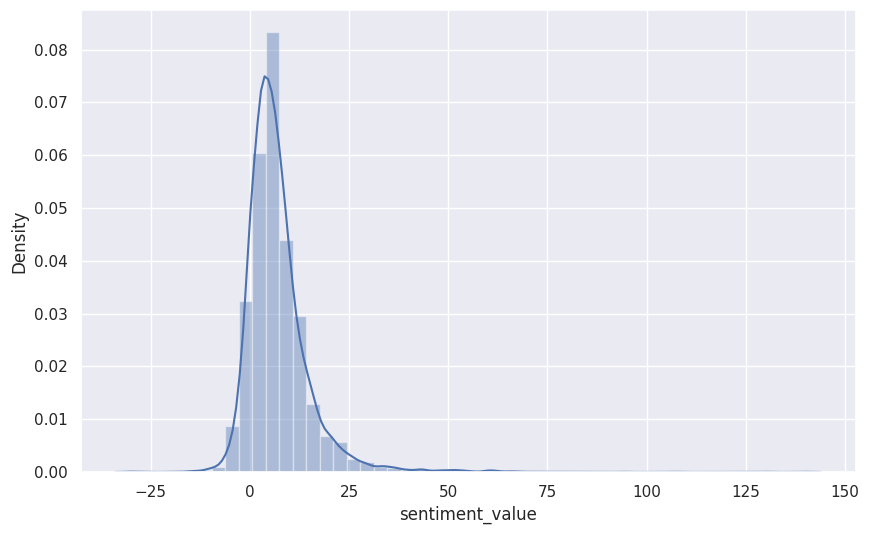

In [52]:
# Checking the distribution of reviews

import seaborn as sns
sns.set(rc={'figure.figsize':(10,6)})
sns.distplot(reviews['sentiment_value'])

<Axes: ylabel='sentiment_value'>

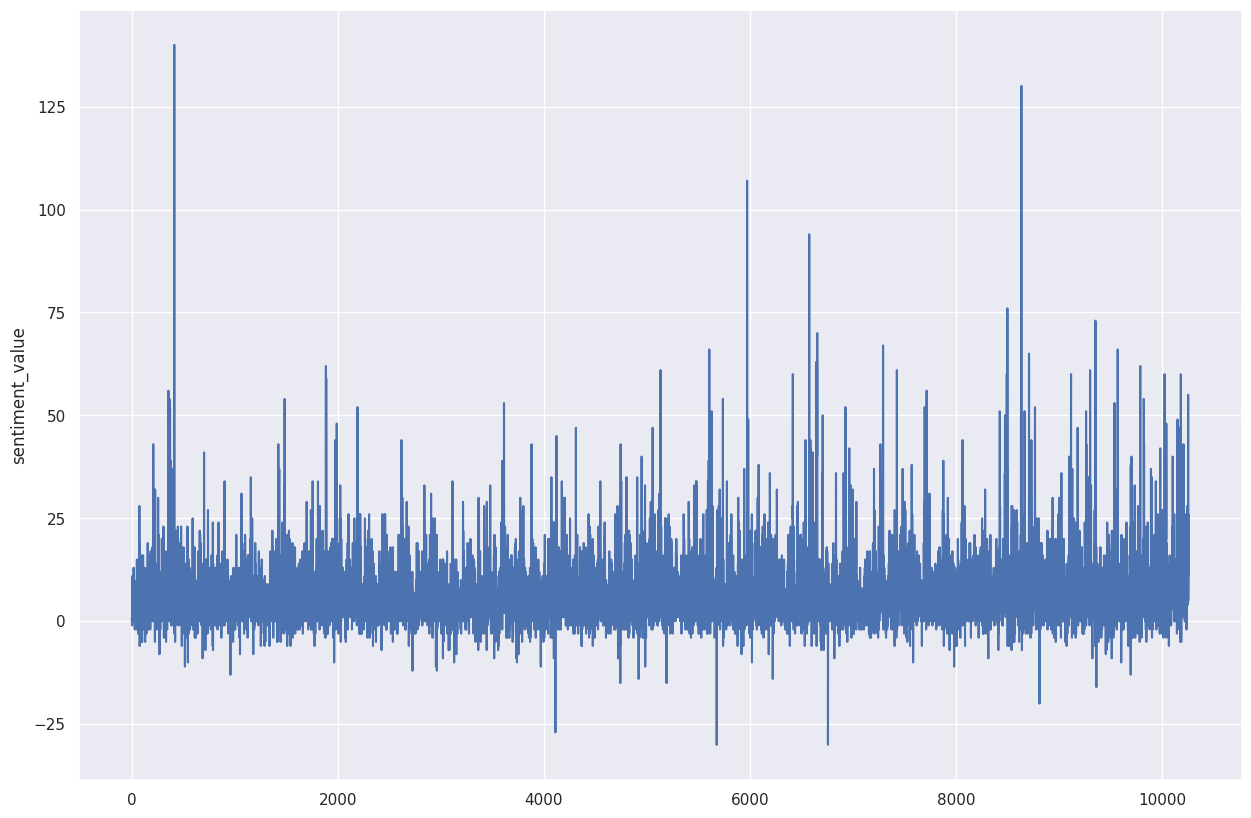

In [55]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x=reviews.index,data=reviews)

In [56]:
# This function will return sentiment category based on values in sentiment_value column

def sentiment_cat(row):

    '''This function returns sentiment category based on values in sentiment_value column'''

    if row['sentiment_value'] < 0:
        val = 'Negative'
    elif row['sentiment_value'] == 0:
        val = 'Neutral'
    elif row['sentiment_value'] > 0:
        val = 'Positive'
    else:
        val = -1
    return val

In [57]:
#Applying the function in our new column
reviews['sentiment_category'] = reviews.apply(sentiment_cat, axis=1)
reviews.head()

,review_id,asin,overall,reviews,sentiment,year,Month,day,helpful_rate,sentiment_value,word_count,sentiment_category
0,A2IBPI20UZIR0U,1384719342,5.0,not much write but exactly supposed filters po...,Positive,2014,02,28,0.00,0,25,Neutral
1,A14VAT5EAX3D9S,1384719342,5.0,product exactly quite affordablei not realized...,Positive,2013,03,16,0.93,1,55,Positive
2,A195EZSQDW3E21,1384719342,5.0,primary job device block breath would otherwis...,Positive,2013,08,28,1.00,-1,48,Negative
3,A2C00NNG1ZQQG2,1384719342,5.0,nice windscreen protects mxl mic prevents pops...,Positive,2014,02,14,0.00,4,22,Positive
4,A94QU4C90B1AX,1384719342,5.0,pop filter great looks performs like studio fi...,Positive,2014,02,21,0.00,5,21,Positive


In [58]:
reviews['sentiment_category'].value_counts()

Positive    8769
Negative     859
Neutral      633
Name: sentiment_category, dtype: int64